#### Plotting file

File to plot graphs used in report.

Please obtain pickle files first by runnning making_pkls.ipynb

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl

### Comparison of all scripts

In [ ]:
all_scripts = ["LebwohlLasher.py", "NumpyVecLebwohlLasher.py", "NumbaLebwohlLasher.py", "run_cython.py", "run_parallel_cython.py", "mpi4pyLebwohlLasher.py", "run_mpi_cython.py"]
slow_scripts = ["mpi4pyLebwohlLasher.py", "LebwohlLasher.py"]
mpi_scripts = ["mpi4pyLebwohlLasher.py", "run_mpi_cython.py"]
fast_scripts = ["NumpyVecLebwohlLasher.py", "NumbaLebwohlLasher.py", "run_cython.py", "run_parallel_cython.py"]


In [45]:
all_lattice_sizes = [25, 50, 100, 150, 200]
fast_lattice_sizes =  [25, 50, 100, 150, 300, 450, 700]
numba_threads_lattice_sizes =[25,50,100,150,200,400,700]


### Comparison of all scripts

In [ ]:
with open('all_scripts.pkl', 'rb') as handle:
    all_scripts = pkl.load(handle)

Text(0, 0.5, 'Time of simulation / s')

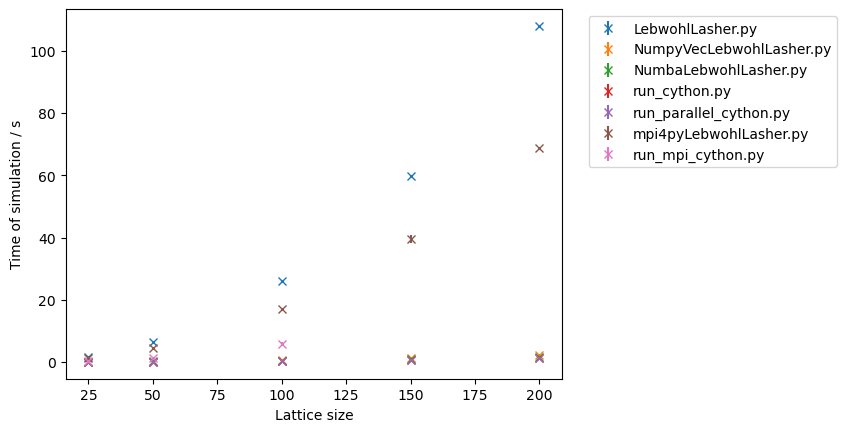

In [ ]:
fig, ax = plt.subplots()
for script in all_scripts:
    ax.errorbar(all_lattice_sizes, all_scripts[f"{script}_times"], all_scripts[f"{script}_stds"], linestyle="", label=script, marker='x')
    
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
ax.set_xlabel("Lattice size")
ax.set_ylabel("Time of simulation / s")

### MPI vs normal 

Plot to show that MPI only improves on base script if lattice is large - needs each worker to have plenty of calculations to do otherwise the gain from parallisation is diminished by the overhead of sending between workers. 

In [ ]:
with open('mpi_comp.pkl', 'rb') as handle:
    mpi_comp = pkl.load(handle)

Text(0, 0.5, 'Time / s')

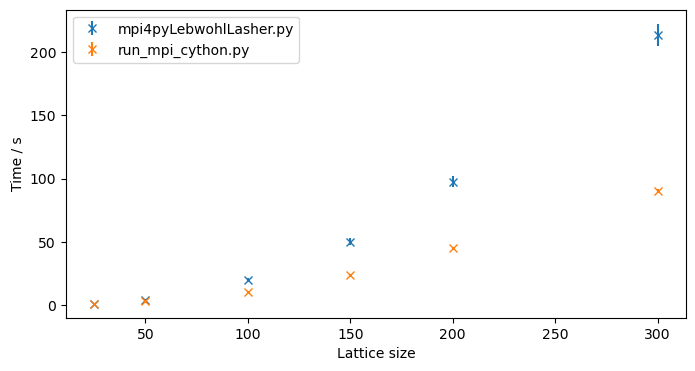

In [ ]:
fig, ax = plt.subplots( figsize=(8,4))
for script in mpi_scripts:
    ax.errorbar(all_lattice_sizes, mpi_comp[f"{script}_times"], yerr=mpi_comp[f"{script}_stds"], linestyle="", label=script, marker='x')
    
ax.legend()
ax.set_xlabel("Lattice size")
ax.set_ylabel("Time / s")

### Multi threaded scripts

Determining optimal number of threads to use

In [ ]:
with open('parallel_numba_threads.pkl', 'rb') as handle:
    parallel_numba_threads = pkl.load(handle)
print("parallel_numba_threads loaded in")



num_threads = [1,2,4]


parallel_numba_threads loaded in


Text(0, 0.5, 'Time / s')

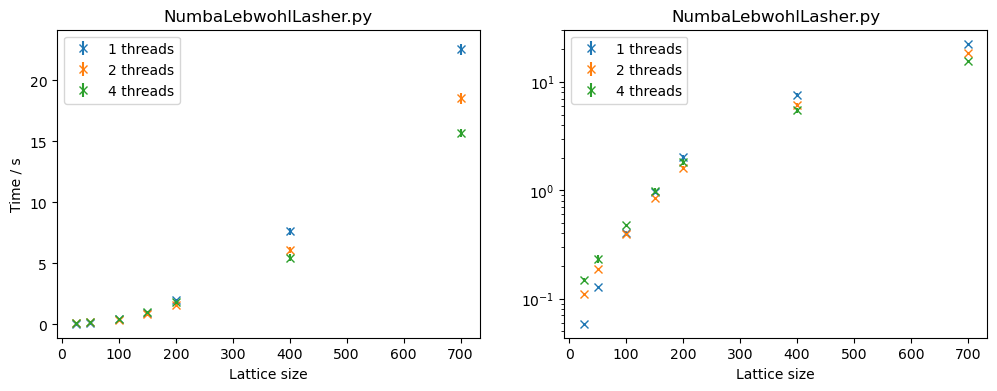

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
scripts = ["NumbaLebwohlLasher.py"]

for i in range(2):
    for thread in (num_threads):
        ax[i].errorbar(numba_threads_lattice_sizes, parallel_numba_threads[f"{script}_thread{thread}_times"], yerr=parallel_numba_threads[f"{script}_thread{thread}_stds"], linestyle="", label=f"{thread} threads", marker='x')
    ax[i].set_title(script)
    ax[i].legend()
    ax[i].set_xlabel("Lattice size")

    ax[1].set_yscale('log')


ax[0].set_ylabel("Time / s")

### fast scripts comparison

In [ ]:
with open('fast_scripts_lattice_size.pkl', 'rb') as handle:
    fast_scripts_lattice_size = pkl.load(handle)
    
fast_scripts_lattice_size

{'NumpyVecLebwohlLasher.py_times': array([ 0.062868,  0.152696,  0.57813 ,  1.216378,  4.94167 , 11.5953  ,
        27.59005 ]),
 'NumpyVecLebwohlLasher.py_stds': array([0.0039054 , 0.00819566, 0.07588794, 0.02246158, 0.08604   ,
        0.0499    , 0.29735   ]),
 'NumbaLebwohlLasher.py_times': array([ 0.154778,  0.22518 ,  0.39594 ,  0.78096 ,  3.054255,  7.557735,
        16.45665 ]),
 'NumbaLebwohlLasher.py_stds': array([0.00543983, 0.01164509, 0.01507905, 0.01267958, 0.045975  ,
        0.341425  , 0.06425   ]),
 'run_parallel_cython.py_times': array([ 0.026718,  0.08603 ,  0.3066  ,  0.664846,  2.490565,  5.70428 ,
        13.61375 ]),
 'run_parallel_cython.py_stds': array([0.00127385, 0.00197146, 0.01405435, 0.01145621, 0.017635  ,
        0.15688   , 0.03445   ]),
 'run_cython2.py_times': array([ 0.02849 ,  0.102706,  0.343622,  0.757448,  3.11654 ,  6.75385 ,
        16.326   ]),
 'run_cython2.py_stds': array([0.00357495, 0.02238015, 0.00384453, 0.01820798, 0.05139   ,
        

In [44]:
fast_lattice_sizes

[25, 50, 100, 200, 300, 700]

Text(0, 0.5, 'Time / s')

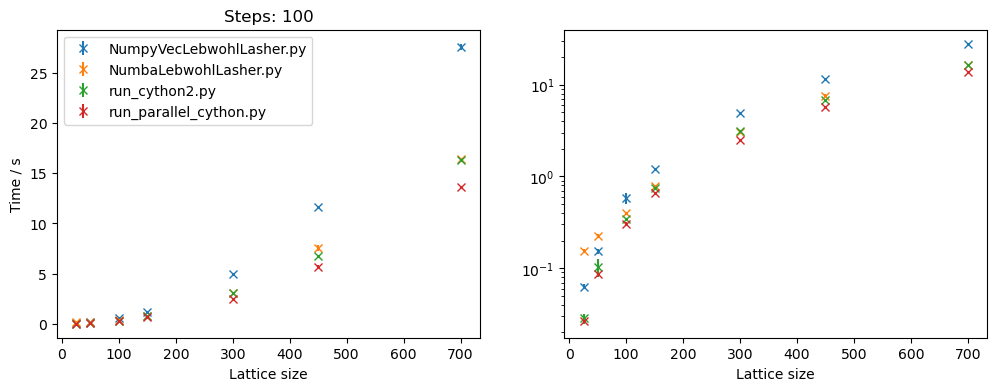

In [46]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
for script in fast_scripts:
    y = fast_scripts_lattice_size[f"{script}_times"]
    yerr = fast_scripts_lattice_size[f"{script}_stds"]
    ax[0].errorbar(fast_lattice_sizes, y, yerr=yerr, linestyle="", label=script, marker='x')
    ax[1].errorbar(fast_lattice_sizes, y, yerr=yerr, linestyle="", marker='x')
    
ax[0].legend()
ax[0].set_xlabel("Lattice size")
ax[1].set_xlabel("Lattice size")
ax[0].set_title("Steps: 100")
ax[1].set_yscale('log')
# fig.set_title("Lattice size: 50")
ax[0].set_ylabel("Time / s")

### Order vs Temp

In [ ]:
with open('temp_order.pkl', 'rb') as handle:
    temp_order = pkl.load(handle)
    
temp_order

In [64]:
def plot_order_vs_temp(temp, order, order_err, nmax):
    # needs error bars
    fig, ax = plt.subplots()
    ax.errorbar(temp, order, yerr=order_err, linestyle="", label=script, marker='x')
    ax.set_xlabel("Reduced Temperature, T*")
    ax.set_ylabel("Order Parameter")
    ax.set_title(f"{nmax}x{nmax} Lebwohl-Lasher model")
    plt.show()

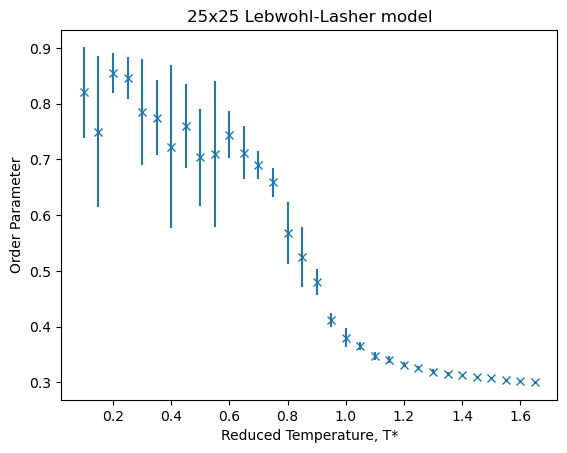

In [ ]:
temps = np.arange(0.1, 1.7, 0.05)
nmax = 25 

orders = temp_order[f"{script}_orders"]
order_err = temp_order[f"{script}_stds"]

plot_order_vs_temp(temps, orders, order_err, nmax)